## Moving Average Convergence Divergence (MACD) Indicator:

In [2]:
%pip uninstall ibapi --yes

Found existing installation: ibapi 9.81.1.post1
Uninstalling ibapi-9.81.1.post1:
  Successfully uninstalled ibapi-9.81.1.post1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install --target /Users/eason/Library/Python/3.8/lib/python/site-packages ta

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import ta

/Users/eason/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# MACD = 12-period EMA (Exponential Moving Average) - 26-period EMA
data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [5]:
macd_object = ta.trend.MACD(data['Close'])
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,MACD_Signal,MACD_Diff
Date,,,,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,5.223831,4.421231,0.802601
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,5.495890,4.636162,0.859727
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,6.031711,4.915272,1.116439
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,5.723858,5.076989,0.646868
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300,5.042505,5.070092,-0.027588


In [17]:
class ta.trend.MACD(
  close: pandas.core.series.Series, 
  window_slow: int = 26, window_fast: int = 12, 
  window_sign: int = 9, fillna: bool = False
)

SyntaxError: invalid syntax (2714888647.py, line 1)

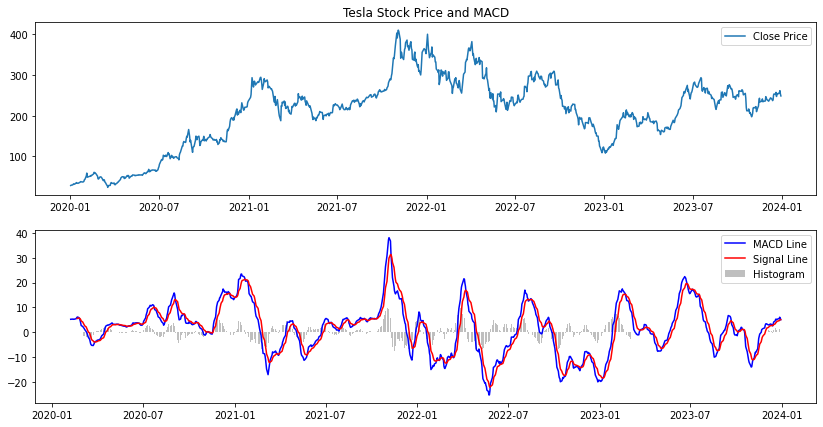

In [6]:
# Plotting
plt.figure(figsize=(14, 7))

# Plotting Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Tesla Stock Price and MACD')
plt.legend()

# Plotting MACD
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
plt.legend()

plt.show()

## Bollinger Bands Indicator:

In [24]:
!pip install --target /Users/eason/Library/Python/3.8/lib/python/site-packages TA_Lib

  Using cached TA-Lib-0.4.28.tar.gz (357 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for TA_Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-38
      creating build/lib.macosx-10.9-x86_64-cpython-38/talib
      copying talib/abstract.py -> build/lib.macosx-10.9-x86_64-cpython-38/talib
      copying talib/deprecated.py -> build/lib.macosx-10.9-x86_64-cpython-38/talib
      copying talib/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-38/talib
      copying talib/

In [25]:
import ta
import talib
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'talib'

In [ ]:
ticker = "TSLA"

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=700)).strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date, interval='1h')

mpf.plot(data, type='candle', volume=True, style='yahoo')

In [ ]:
indicator_bb = ta.volatility.BollingerBands(close=data["Close"], 
                                            window=20, window_dev=2)
data['bb_bbm'] = indicator_bb.bollinger_mavg()   # Middle Band
data['bb_bbh'] = indicator_bb.bollinger_hband()  # Upper Band
data['bb_bbl'] = indicator_bb.bollinger_lband()  # Lower Band
data.tail()

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(data["Close"], label='Tesla Prices', color='blue')
plt.plot(data['bb_bbh'], label='Upper Band', color='red')
plt.plot(data['bb_bbm'], label='Middle Band (SMA)', color='green')
plt.plot(data['bb_bbl'], label='Lower Band', color='red')
plt.title('Bollinger Bands for Tesla Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## RSI relative strength index:

In [ ]:
%pip install mplfinance

In [26]:
import yfinance as yf
from datetime import datetime, timedelta

ticker = "TSLA"

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=700)).strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date, interval='1h')

[*********************100%%**********************]  1 of 1 completed


/Users/eason/Library/Python/3.8/lib/python/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


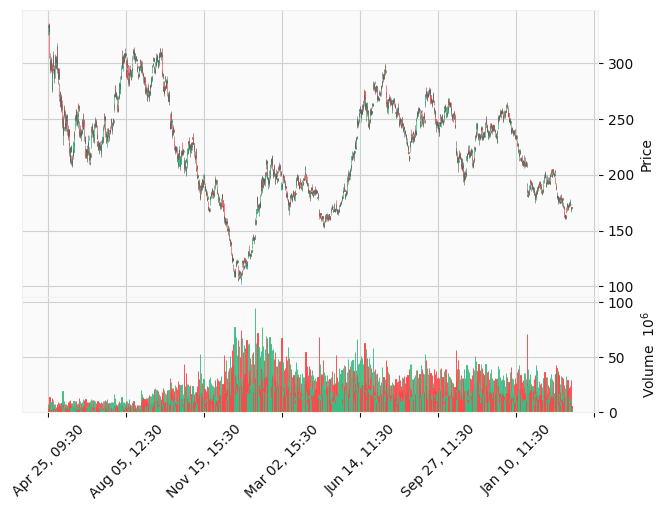

In [29]:
import mplfinance as mpf

mpf.plot(data, type='candle', volume=True, style='yahoo')

In [30]:
import ta

data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()

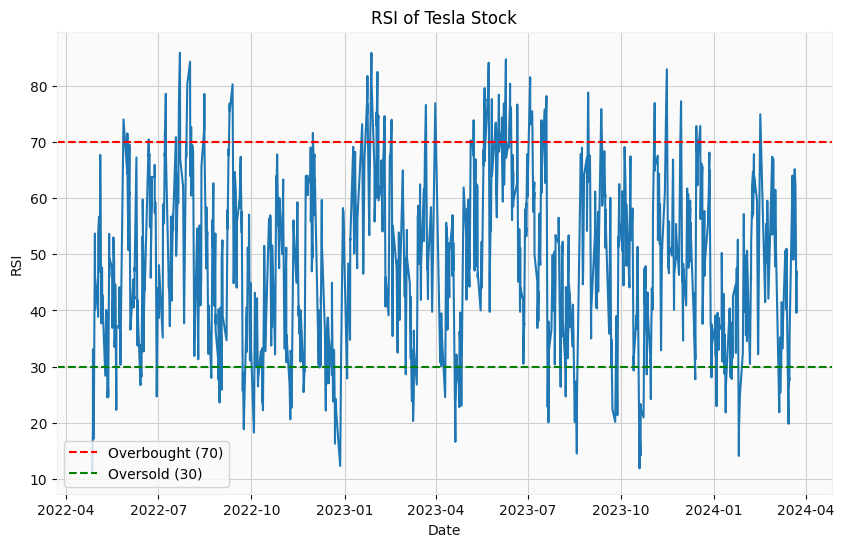

In [31]:
import matplotlib.pyplot as plt

upper_limit = 70
lower_limit = 30

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['RSI'])
plt.axhline(y=upper_limit, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=lower_limit, color='g', linestyle='--', label='Oversold (30)')
plt.title('RSI of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Define the initial capital and track the current capital
initial_capital = 100
current_capital = initial_capital

# Define the overbought and oversold limits
overbought_limit = 70
oversold_limit = 30

# Define the initial holding status
is_holding = False

# Iterate through the RSI data and make buy/sell decisions
for i in range(1, len(data)):
    current_rsi = data['RSI'][i]
    current_price = data['Close'][i]

    if current_rsi < oversold_limit and not is_holding:
        # Buy condition
        shares_to_buy = current_capital / current_price
        current_capital = 0
        is_holding = True
        print(f"Buy {shares_to_buy} shares at {current_price} -> Rsi Level: {current_rsi}")

    elif current_rsi > overbought_limit and is_holding:
        # Sell condition
        current_capital = current_capital + (current_price * shares_to_buy)
        is_holding = False
        print(f"Sell {shares_to_buy} shares at {current_price} -> Rsi Level: {current_rsi}")

# Print the final capital
print(f"Final capital: ${current_capital}")

Buy 0.34232117954551555 shares at 292.1233215332031 -> Rsi Level: 11.0725757384145
Sell 0.34232117954551555 shares at 249.22999572753906 -> Rsi Level: 71.8882205087888
Buy 0.39413929778297857 shares at 216.4633331298828 -> Rsi Level: 26.689611515656594
Sell 0.39413929778297857 shares at 241.20948791503906 -> Rsi Level: 70.16173425384046
Buy 0.4211739352209804 shares at 225.72654724121094 -> Rsi Level: 27.52156199916459
Sell 0.4211739352209804 shares at 243.37489318847656 -> Rsi Level: 70.28394944625396
Buy 0.35614543202500315 shares at 287.8126525878906 -> Rsi Level: 27.980655963329724
Sell 0.35614543202500315 shares at 296.7300109863281 -> Rsi Level: 75.4835036371068
Buy 0.36068547148814584 shares at 292.9949951171875 -> Rsi Level: 28.480324052024187
Sell 0.36068547148814584 shares at 194.70750427246094 -> Rsi Level: 71.63111366487502
Buy 0.405896233074887 shares at 173.02000427246094 -> Rsi Level: 29.815023950759894
Sell 0.405896233074887 shares at 129.5399932861328 -> Rsi Level: 70.